# IST 664 HW2
## Name: Lu Guo

## Introduction: 

In this homework, we will use the data from HW1, which contains the reviewText and summary for movies. 

The first task is to extract sentences from the reviewText and summary, then describe the sentences, including i“reviewText? (1 or 0)”, “summary? (1 or 0)”, “original text”, “extracted sentence”, “length of a sentence”, “adjective word list”, “noun list”, “bigram list”, “capital word list”, and “exclamation mark? (1 or 0)”. The result of task 1 is saved in goolge drive. The link to task 1 csv is https://drive.google.com/file/d/1-3wUCvQVo3JrSkzP1084witD_HMvNni1/view?usp=share_link.

The second task is predict sentiment for each sentence. Then decribe "reviewText”, “the number of positive sentences in reviewText", "the number of negative sentences in reviewText", "summary", “the number of positive sentences in summary”, and “the number of negative sentences in summary”. The result of task 2 is also saved in google drive. The link to taks 2 csv is https://drive.google.com/file/d/1-1DMeTodcgsfuptoeHrawZW52SMjFwcu/view?usp=share_link.

The link of code in google colab is:  https://colab.research.google.com/drive/1Yw4Vc08zj1l87Ub-u7Xzy4jDR3bKjpy7#scrollTo=a8IEtOx1IJgO

The link to introduction video is: https://video.syr.edu/media/t/1_2ia4jh19

# Task 1: Extract sentences from reviewText and summary

## 1.1 Load data

In [1]:
from google.colab import drive
drive.mount("/drive", force_remount=True)

import json
import pandas as pd

data = []
with open('/drive/My Drive/Colab Notebooks/Wed_Homework1/Amazon_Instant_Video_5.json') as f:
    for line in f:
        data.append(json.loads(line))
# Extract the desired fields and save to a dataframe
df = pd.DataFrame(data, columns=['reviewText', 'summary'])

Mounted at /drive


In [2]:
df = df[:2000] # only use the first 2000 rows of review, so that the program can run faster
df.head(2)

,reviewText,summary
0,I had big expectations because I love English ...,A little bit boring for me
1,I highly recommend this series. It is a must f...,Excellent Grown Up TV


In [3]:
# create new dataframe to split review and summary
df_review = df[df.columns[0:1]] # reviewText
print(df_review.head())
df_summary = df[df.columns[1:]] # summary
print(df_summary.head())

                                          reviewText
0  I had big expectations because I love English ...
1  I highly recommend this series. It is a must f...
2  This one is a real snoozer. Don't believe anyt...
3  Mysteries are interesting.  The tension betwee...
4  This show always is excellent, as far as briti...
                          summary
0      A little bit boring for me
1           Excellent Grown Up TV
2           Way too boring for me
3     Robson Green is mesmerizing
4  Robson green and great writing


## 1.2 Extract sentences from reviewText and summary

Extract sentences from reviewText:

In [4]:
import nltk
nltk.download('punkt')

def split_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

# split review to sentences, each row has one sentence
df_review = df_review.assign(sentence=df_review['reviewText'].apply(split_sentences)).explode('sentence').reset_index(drop=True)

# rename reviewText to original text, and sentence to extracted sentence
df_review = df_review.rename(columns={'reviewText': 'original text', 'sentence':'extracted sentence'})
# add a coulmn called reviewText and give value = 1 to all rows, which represents the extracted sentence is from reviewText
df_review['reviewText? (1 or 0)'] = 1
df_review['summary? (1 or 0)'] = 0
df_review.head()

print(df_review.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                       original text  \
0  I had big expectations because I love English ...   
1  I had big expectations because I love English ...   
2  I highly recommend this series. It is a must f...   
3  I highly recommend this series. It is a must f...   
4  I highly recommend this series. It is a must f...   

                                  extracted sentence  reviewText? (1 or 0)  \
0  I had big expectations because I love English ...                     1   
1                     It didn't appeal to me at all.                     1   
2                    I highly recommend this series.                     1   
3  It is a must for anyone who is yearning to wat...                     1   
4  Complex characters and plots to keep one total...                     1   

   summary? (1 or 0)  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


Extract sentences from summary:

In [5]:
# rename summary to original text
df_summary = df_summary.assign(sentence=df_summary['summary'].apply(split_sentences)).explode('sentence').reset_index(drop=True)
df_summary = df_summary.rename(columns={'summary': 'original text', 'sentence':'extracted sentence'})
# add a coulmn called reviewText and give value = 1 to all rows
df_summary['reviewText? (1 or 0)'] = 0
df_summary['summary? (1 or 0)'] = 1
df_summary.head()

,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0)
0,A little bit boring for me,A little bit boring for me,0,1
1,Excellent Grown Up TV,Excellent Grown Up TV,0,1
2,Way too boring for me,Way too boring for me,0,1
3,Robson Green is mesmerizing,Robson Green is mesmerizing,0,1
4,Robson green and great writing,Robson green and great writing,0,1


Merge reviewText and summary:

In [6]:
df_merged = pd.concat([df_review, df_summary], ignore_index=True)
print("Number of sentences from reviewText: " + str(len(df_review)))
print("Number of sentences from summary: " + str(len(df_summary)))
print("Total rows: " + str(len(df_merged)))
df_merged.head()

Number of sentences from reviewText: 13005
Number of sentences from summary: 2130
Total rows: 15135


,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0)
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0
1,I had big expectations because I love English ...,It didn't appeal to me at all.,1,0
2,I highly recommend this series. It is a must f...,I highly recommend this series.,1,0
3,I highly recommend this series. It is a must f...,It is a must for anyone who is yearning to wat...,1,0
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,1,0


## 1.3 Tokenize sentences

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

df_merged['tokens'] = df_merged['extracted sentence'].apply(nlp) # apply spacy to tokenize the sentence
df_merged.head()

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ..."
1,I had big expectations because I love English ...,It didn't appeal to me at all.,1,0,"(It, did, n't, appeal, to, me, at, all, .)"
2,I highly recommend this series. It is a must f...,I highly recommend this series.,1,0,"(I, highly, recommend, this, series, .)"
3,I highly recommend this series. It is a must f...,It is a must for anyone who is yearning to wat...,1,0,"(It, is, a, must, for, anyone, who, is, yearni..."
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,1,0,"(Complex, characters, and, plots, to, keep, on..."


## 1.4 Preprocess tokens

Remove stopwords for filter sentences with subjective words, capital words, or exclamation marks.

If we don't remove stopwords, captial words like "I", "A" will be selected, but these words are not helpful for sentiment analysis.

I don't do lowercase because the capital words are helpful for sentiment analysis.

I don't do lemmatization because it will influence the result of sentiment analysis, for example, "better" and "good" will be lemmatized to "good". But I want to keep the "better" for sentiment analysis.

In [8]:
def remove_stopwords(tokens):
    return [token for token in tokens if (token.text == "!") or (not token.is_stop)] # I need to keep the "!"

df_merged['tokens_no_stopwords'] = df_merged['tokens'].apply(lambda x: remove_stopwords(x))
df_merged.head(1)

,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens,tokens_no_stopwords
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ...","[big, expectations, love, English, TV, ,, part..."


## 1.5 Filter sentence that contains subjective words, capital words, or exclamation marks

In [9]:
df_merged['match'] = 0 # create a new column called match, and give default value = 0 to all rows, which represents the sentence does not match the criteria
for i in range(len(df_merged)):
  for token in df_merged.iloc[i, -2]: # use tokens_no_stopwords column to filter sentences
    if (token.is_upper) or (token.text == '!') or (token.pos_ == 'ADJ'): # if the sentence contains upper case, exclamation mark or adjective, then it matches the criteria
      df_merged.at[i,'match'] = 1 # if the sentence matches the criteria, then change the value of match to 1
      break

df_selected = df_merged[df_merged['match'] == 1] # select the sentences that match the criteria
df_selected = df_selected.reset_index(drop=True) # reset the index
print(len(df_selected))
df_selected.head(2)

10867


,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens,tokens_no_stopwords,match
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ...","[big, expectations, love, English, TV, ,, part...",1
1,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,1,0,"(Complex, characters, and, plots, to, keep, on...","[Complex, characters, plots, totally, involved...",1


## 1.6 Add description columns

(1) Add the length of the sentence as a new column:


In [10]:
df_selected['length of a sentence'] = df_selected['extracted sentence'].apply(len)

(2) Add the adjective word list as a new column:

In [11]:
# define a function to extract the adjectives
def get_adjectives(doc):
    adj = [token for token in doc if token.pos_ == 'ADJ']
    if len(adj) == 0:
        return 0
    else:
        return adj
df_selected['adjective word list'] = df_selected['tokens'].apply(get_adjectives)


(3) Add the noun list as a new column:

In [12]:
# define a function to extract the nouns in a document
def get_nouns(doc):
    nouns = [token for token in doc if token.pos_ == 'NOUN']
    if len(nouns) == 0:
        return 0
    else:
        return nouns  
df_selected['noun list'] = df_selected['tokens'].apply(lambda doc: get_nouns(doc))

(4) Add the capital word list as a new column, I use tokens_no_stopwords so that remove capital words like "I", "A".

In [13]:
# define a function to extract the capitalized words in a document
def get_capitalized_words(doc):
    capit = [token for token in doc if token.is_upper]
    if len(capit) == 0:
        return 0
    else:
        return capit       

df_selected['capital word list'] = df_selected['tokens_no_stopwords'].apply(get_capitalized_words)

(5) Add the exclamation mark as a new column:

In [14]:
def get_exclamation_mark(doc):
  if any(token.text == '!' for token in doc):
    return 1 # if the sentence contains exclamation mark, then return 1
  else:
    return 0 # if the sentence does not contain exclamation mark, then return 0
df_selected['exclamation mark? (1 or 0)'] = df_selected['tokens'].apply(get_exclamation_mark)

(6) Create bigrams by using tokens that don't remove stopwords:

In [15]:
import nltk

# Define a function to extract bigrams based on part-of-speech tags
def get_bigrams(doc):
    # Create a list of words
    words = [token.text for token in doc]
    # Create a list of bigrams
    bigrams = list(nltk.bigrams(words))
    # Filter the bigrams based on part-of-speech tags
    word_list = [token.text for token in doc if token.pos_ in ['ADJ', 'NOUN', 'VERB']]
    result = []
    for bigram in bigrams:
        if any(word in word_list for word in bigram):
            result.append(bigram)
    return result

# Apply the get_bigrams function to the 'text' column and assign the result to the 'bigram list' column
df_selected['bigram list'] = df_selected['tokens'].apply(get_bigrams)

Remove match column:

In [16]:
df_selected = df_selected.drop(['match'], axis=1)
df_selected.head(1)

,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens,tokens_no_stopwords,length of a sentence,adjective word list,noun list,capital word list,exclamation mark? (1 or 0),bigram list
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ...","[big, expectations, love, English, TV, ,, part...",128,"[big, particular, Investigative, boring]","[expectations, TV, stuff, guy]",[TV],0,"[(I, had), (had, big), (big, expectations), (e..."


## 1.7 Save the result for task 1

In [17]:
df_task1 = df_selected[['reviewText? (1 or 0)', 'summary? (1 or 0)','original text','extracted sentence', 'length of a sentence', 'adjective word list', 'noun list', 'bigram list','capital word list', 'exclamation mark? (1 or 0)']]
df_task1.head(1)
df_task1.to_csv("/drive/My Drive/Colab Notebooks/Wed_Homework1/task1.csv")

# Link: https://drive.google.com/file/d/1-3wUCvQVo3JrSkzP1084witD_HMvNni1/view?usp=share_link

# Task 2: Predict sentiment for each sentence

## 2.1 Build a classifier 

### Use sentence_polarity corpus
I use sentence_polarity because this dataset contains a large number of customer reviews, and specific to the movie domain, which is suitable for our review data. 

And it is easily downloaded and integrated into existing sentiment analysis workflows. 

Furthermore, it is a balanced dataset, which means that it contains an equal number of positive and negative reviews.



### 2.1.1 Start: Bag-of-word

In [18]:
# movie review sentences
import nltk
nltk.download('sentence_polarity')
from nltk.corpus import sentence_polarity
import random

# setup the movie reviews sentences for classification
documents = [(sent, cat) for cat in sentence_polarity.categories() 
	for sent in sentence_polarity.sents(categories=cat)]

# Since the documents are in order by label, we mix them up for later separation into training and test sets.
random.shuffle(documents)

all_words_list = [word for (sent,cat) in documents for word in sent]
all_words = nltk.FreqDist(all_words_list)

# get the 1000 most frequently appearing keywords in the corpus
word_items = all_words.most_common(1000)
word_features = [word for (word,count) in word_items]
print(word_features[:10])

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package sentence_polarity is already up-to-date!


['.', 'the', ',', 'a', 'and', 'of', 'to', 'is', 'in', 'that']


In [19]:
# define the new feature sets
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features: # this is the bag of words, with the 1000 most common words, and a boolean value for each word
        features['V_{}'.format(word)] = (word in document_words)
    return features
featuresets0 = [(document_features(d, word_features), c) for (d, c) in documents]


In [20]:
train_set0, test_set0 = featuresets0[1000:], featuresets0[:1000]
classifier0 = nltk.NaiveBayesClassifier.train(train_set0)
nltk.classify.accuracy(classifier0, test_set0)

0.71

In [21]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import numpy as np

k_fold = KFold(n_splits=2)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_indices, test_indices in k_fold.split(featuresets0):
    # train the classifier on the training set
    nb_classifier = NaiveBayesClassifier.train([featuresets0[i] for i in train_indices])

    # evaluate the classifier on the test set and compute the accuracy
    test_set = [featuresets0[i] for i in test_indices]
    accuracy_val = accuracy(nb_classifier, test_set)
    accuracies.append(accuracy_val)

    # compute precision, recall, and F1-score
    y_true = [cat for _, cat in test_set]
    y_pred = [nb_classifier.classify(doc) for doc, _ in test_set]
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# print the evaluation metrics for each fold and the mean metrics over all folds
print("Average accuracy: ", np.mean(accuracies))
print("Average precision: ", np.mean(precisions))
print("Average recall: ", np.mean(recalls))
print("Average F1-score: ", np.mean(f1_scores))

Average accuracy:  0.7115925717501407
Average precision:  0.7116399317794211
Average recall:  0.7115925717501407
Average F1-score:  0.7115693671119729


### 2.1.2 Negation + bag-of-words

This feature set is a combination of the negation feature set and the bag-of-words feature set. First, we select the most frequent 1000 words as features. Then, we add negation features to the feature set.

The bag-of-words features are created in the first for loop, where each word in the document is checked against the word_features list, and if it is present in the list, the corresponding feature is set to True.

The negation features are created in the second for loop. If a word in the document is a negation word (e.g. "not", "never"), or ends with "n't" (e.g. "can't", "didn't"), then the next word in the document is checked against the word_features list, and if it is present, the corresponding negation feature is set to True.

In [22]:
# this list of negation words includes some "approximate negators" like hardly and rarely
negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

def NOT_features(document, word_features, negationwords):
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
    # go through document words in order
    for i in range(0, len(document)):
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features
# define the feature sets
NOT_featuresets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in documents]

In [23]:
train_set1, test_set1 = NOT_featuresets[1000:], NOT_featuresets[:1000]
classifier1 = nltk.NaiveBayesClassifier.train(train_set1)
nltk.classify.accuracy(classifier1, test_set1)

0.754

For this negation+bag-of-words feature set, I use Naive Bayes classifier and cross validation to evaluate the performance of the classifier.

I use 5-fold cross validation to evaluate the performance of the classifier. And calculate the average accuracy, precision, recall, and F1 score.

In [24]:
k_fold = KFold(n_splits=2)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_indices, test_indices in k_fold.split(NOT_featuresets):
    # train the classifier on the training set
    nb_classifier = NaiveBayesClassifier.train([NOT_featuresets[i] for i in train_indices])

    # evaluate the classifier on the test set and compute the accuracy
    test_set = [NOT_featuresets[i] for i in test_indices]
    accuracy_val = accuracy(nb_classifier, test_set)
    accuracies.append(accuracy_val)

    # compute precision, recall, and F1-score
    y_true = [cat for _, cat in test_set]
    y_pred = [nb_classifier.classify(doc) for doc, _ in test_set]
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# print the evaluation metrics for each fold and the mean metrics over all folds
print("Average accuracy: ", np.mean(accuracies))
print("Average precision: ", np.mean(precisions))
print("Average recall: ", np.mean(recalls))
print("Average F1-score: ", np.mean(f1_scores))


Average accuracy:  0.751735134121178
Average precision:  0.7518018377443548
Average recall:  0.751735134121178
Average F1-score:  0.7517234707909055


The result is better than the basic bag-of-word model.

### 2.1.3 Stopwords + Bag-of-word

The feature set is a combination of the stopwords feature set and the bag-of-words feature set. It contains bag-of-words features based on the 1000 most common words in the documents after removing stopwords and some negation words.

In [25]:
# setup the movie reviews sentences for classification
documents = [(sent, cat) for cat in sentence_polarity.categories() 
	for sent in sentence_polarity.sents(categories=cat)]
random.shuffle(documents)

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(len(stopwords))
print(stopwords)

# remove some negation words from the stopword list
negationwords.extend(['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'])

newstopwords = [word for word in stopwords if word not in negationwords]
print(len(newstopwords))
print(newstopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# remove stop words from the all words list
new_all_words_list = [word for (sent,cat) in documents for word in sent if word not in newstopwords]
len(new_all_words_list)

# continue to define a new all words dictionary, get the 1000 most common as new_word_features
new_all_words = nltk.FreqDist(new_all_words_list)
new_word_items = new_all_words.most_common(1000)
new_word_features = [word for (word,count) in new_word_items]
print(new_word_features[:30])

['.', ',', 'film', 'movie', 'not', 'one', 'like', '"', '--', 'story', 'no', 'much', 'even', 'good', 'comedy', 'time', 'characters', 'little', 'way', 'funny', 'make', 'enough', 'never', 'makes', 'may', 'us', 'work', 'best', 'bad', 'director']


In [27]:
# get features sets for a document, including keyword features and category feature
stopwords_featuresets = [(document_features(d, new_word_features), c) for (d, c) in documents]

train_set2, test_set2 = stopwords_featuresets[1000:], stopwords_featuresets[:1000]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, test_set2)


0.741

I use Naive Bayes classifier and cross validation to evaluate the performance of the classifier for the stopwords+bag-of-words feature set. And calculate the average accuracy, precision, recall, and F1 score.

In [28]:
k_fold = KFold(n_splits=2)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_indices, test_indices in k_fold.split(stopwords_featuresets):
    # train the classifier on the training set
    nb_classifier = NaiveBayesClassifier.train([stopwords_featuresets[i] for i in train_indices])

    # evaluate the classifier on the test set and compute the accuracy
    test_set = [stopwords_featuresets[i] for i in test_indices]
    accuracy_val = accuracy(nb_classifier, test_set)
    accuracies.append(accuracy_val)

    # compute precision, recall, and F1-score
    y_true = [cat for _, cat in test_set]
    y_pred = [nb_classifier.classify(doc) for doc, _ in test_set]
    precision2, recall2, f1_score2, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    precisions.append(precision2)
    recalls.append(recall2)
    f1_scores.append(f1_score2)

# print the evaluation metrics for each fold and the mean metrics over all folds
print("Average accuracy: ", np.mean(accuracies))
print("Average precision: ", np.mean(precisions))
print("Average recall: ", np.mean(recalls))
print("Average F1-score: ", np.mean(f1_scores))

Average accuracy:  0.7119677358844494
Average precision:  0.7121120084707723
Average recall:  0.7119677358844494
Average F1-score:  0.7119413447473824


### 2.1.4 Comparision of these feature sets
The baseline feature set which only has bag-of-word has the lowest accuracy among the three feature sets. And the precision, recall and F1-score is almost the same as the stopwords+bag-of-word feature set. So I will not use this one.

The negation+bag-of-word feature set has the highest accuracy, precision, recall and F1-score. So I will use this one.


The stopword+bag-of-word feature set is not as good as the previous one, so I not use stopwords+bag-of-word.

## 2.2 Use the classifier to predict the sentiment of the sentences in the review data

In [29]:
df_selected["token_words"] = df_selected["tokens"].apply(lambda x: x.text)
df_selected.head(1)

,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens,tokens_no_stopwords,length of a sentence,adjective word list,noun list,capital word list,exclamation mark? (1 or 0),bigram list,token_words
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ...","[big, expectations, love, English, TV, ,, part...",128,"[big, particular, Investigative, boring]","[expectations, TV, stuff, guy]",[TV],0,"[(I, had), (had, big), (big, expectations), (e...",I had big expectations because I love English ...


In [30]:
# Use the classifier1 to predict the sentiment of each sentence in the de_selected dataframe
def predict_sentiment(tokens):
    inputfeatures = NOT_features(tokens, word_features, negationwords)
    return classifier1.classify(inputfeatures)

df_selected['sentiment'] = df_selected['token_words'].apply(predict_sentiment)
df_selected.head(1)

,original text,extracted sentence,reviewText? (1 or 0),summary? (1 or 0),tokens,tokens_no_stopwords,length of a sentence,adjective word list,noun list,capital word list,exclamation mark? (1 or 0),bigram list,token_words,sentiment
0,I had big expectations because I love English ...,I had big expectations because I love English ...,1,0,"(I, had, big, expectations, because, I, love, ...","[big, expectations, love, English, TV, ,, part...",128,"[big, particular, Investigative, boring]","[expectations, TV, stuff, guy]",[TV],0,"[(I, had), (had, big), (big, expectations), (e...",I had big expectations because I love English ...,pos


In [31]:
print(len(df_selected[df_selected["sentiment"]=="pos"]))
print(len(df_selected[df_selected["sentiment"]=="neg"]))

6120
4747


In [32]:
df_selected.to_csv("/drive/My Drive/Colab Notebooks/Wed_Homework1/sentiment.csv")

In [33]:
# Group the sentiment by the original text, and get the the number of negative and positive sentiments for each original text
df_task1_group = df_selected.groupby(['original text'])['sentiment'].value_counts().unstack()
# fill the NaN values with 0
df_task1_group = df_task1_group.fillna(0)
df_task1_group.head(2)

sentiment,neg,pos
original text,,
"""24"" is like Red Bull--once you've had it you're addicted. The fifth season of ""24"" revolves around one central mystery: who killed an ex-president and how is Jack Bauer connected to the assassination? It's a thrilling season--probably the best since the first season--and it comes to a stunning conclusion that will be answered in January of 2007. Interestingly after having watched ""Casino Royale"" its clear that the new Bond film was inspired by shows like ""24"" which were, in turn, inspired by early Bond and some of the newer spy thrillers out there. There are a number of twists and turns in this season set my advice is NOT to read any reviews that summarize anymore of the plot if you haven't seen this season as there are some major spoilers in some of the reviews that follow.As usual Fox has put together a terrific DVD. This also features a brief episode ""prequel"" to the sixth season like previous sets had. We get a large amount of worthwhile commentary tracks including some with Emmy winner Kiefer Sutherland. There's also a summary of the season included as well athough if you've watched the show (or are watching it now) it won't really provide anything new. Th ""100 Episode Reel"" is a pretty useless extra -- basically a clips compilation.Different places are offering different exclusives. If you purchase it here you can download a free episode from Unbox (at least during the Holidays) while Target also offers a limited edition bonus disc for this set with additional featurettes on the show. Regardless of whether you buy it here at amazon.com or elsewhere this set features plenty of extras including an examination of the wonderful Presidential retreat featured in the show, a good featurette on the stellar work by the cinematography on the show, a featurette on the supporting actors on the show as well as extended and deleted scenes. I haven't had a chance to dig through all the bonus material yet but it what I have checked out looks really, really good.This set is packaged in the thinpak holders with two discs per holder so the accordian style packaging has been abandoned for this thinner packaging. This is a terrific set for an outstanding season of the series.What I would love to see if Keifer Sutherland and Donald Sutherland featured during a season.",7.0,6.0
"""Another beautiful Miami day. Mutilated corpses with a chance of afternoon showers.""",1.0,1.0


In [34]:
# merge the two dataframes, and get the total number of sentiments for each original text
df_merge1 = pd.merge(df, df_task1_group, how='left', left_on='reviewText', right_on='original text')
# rename the neg column to "the number of negative sentences in reviewText", and pos column to "the number of positive sentences in reviewText"
df_merge1 = df_merge1.rename(columns={'neg': 'the number of negative sentences in reviewText', 'pos': 'the number of positive sentences in reviewText'})

# get the number of positive and negative sentences in the summary
df_merge2 = pd.merge(df_merge1, df_task1_group, how='left', left_on='summary', right_on='original text')
print(len(df_merge2))
# rename the neg column to "the number of negative sentences in reviewText", and pos column to "the number of positive sentences in reviewText"
df_merge2 = df_merge2.rename(columns={'neg': 'the number of negative sentences in summary', 'pos': 'the number of positive sentences in summary'})
# fill the NaN values with 0
df_merge2 = df_merge2.fillna(0)
df_merge2.head(5)


2000


,reviewText,summary,the number of negative sentences in reviewText,the number of positive sentences in reviewText,the number of negative sentences in summary,the number of positive sentences in summary
0,I had big expectations because I love English ...,A little bit boring for me,0.0,1.0,1.0,0.0
1,I highly recommend this series. It is a must f...,Excellent Grown Up TV,0.0,1.0,1.0,0.0
2,This one is a real snoozer. Don't believe anyt...,Way too boring for me,1.0,1.0,1.0,0.0
3,Mysteries are interesting. The tension betwee...,Robson Green is mesmerizing,0.0,3.0,0.0,0.0
4,"This show always is excellent, as far as briti...",Robson green and great writing,3.0,7.0,0.0,1.0


In [35]:
# Delete the rows with the number of positive and negative sentences in reviewText and summary are both 0
df_merge2 = df_merge2[(df_merge2['the number of positive sentences in reviewText'] != 0) | (df_merge2['the number of negative sentences in reviewText'] != 0) | (df_merge2['the number of positive sentences in summary'] != 0) | (df_merge2['the number of negative sentences in summary'] != 0)]
print(len(df_merge2))

1962


## 2.3 Save the result for task 2

In [36]:
df_merge2.to_csv("/drive/My Drive/Colab Notebooks/Wed_Homework1/task2.csv")
# Link: https://drive.google.com/file/d/1-1DMeTodcgsfuptoeHrawZW52SMjFwcu/view?usp=share_link

## 2.4 Analyze the positive sentences or negative sentences for top 50 adjectives, adverbs, and verbs

In [37]:
# analyze all the positive sentences to identify top 50 adjectives, adverbs, and verbs
# get the positive sentences
df_positive = df_selected[df_selected['sentiment'] == 'pos']
df_positive.head(2)
# get all the positive sentences
df_negative = df_selected[df_selected['sentiment'] == 'neg']
df_negative.head(2)
# identify the top 50 adjectives, adverbs, and verbs in the positive sentences
# add all tokens to a list
pos_adj = []
pos_adv = []
pos_verb = []
for i in range(len(df_positive)):
    for token in df_positive.iloc[i]['tokens']:
        if token.pos_ == 'ADJ':
            pos_adj.append(token.text)
        elif token.pos_ == 'ADV':
            pos_adv.append(token.text)
        elif token.pos_ == 'VERB':
            pos_verb.append(token.text)
# get the top 50 adjectives, adverbs, and verbs in the positive sentences
pos_adj = nltk.FreqDist(pos_adj)
print("The top 50 adjectives words in positive sentences:" + str(pos_adj.most_common(50)))
pos_adv = nltk.FreqDist(pos_adv)
print("The top 50 adverbs words in positive sentences:" + str(pos_adv.most_common(50)))
pos_verb = nltk.FreqDist(pos_verb)
print("The top 50 verbs words in positive sentences:" + str(pos_verb.most_common(50)))

# identify the top 50 adjectives, adverbs, and verbs in the negative sentences
# add all tokens to a list
neg_adj = []
neg_adv = []
neg_verb = []
for i in range(len(df_negative)):
    for token in df_negative.iloc[i]['tokens']:
        if token.pos_ == 'ADJ':
            neg_adj.append(token.text)
        elif token.pos_ == 'ADV':
            neg_adv.append(token.text)
        elif token.pos_ == 'VERB':
            neg_verb.append(token.text)
# get the top 50 adjectives, adverbs, and verbs in the negative sentences
neg_adj = nltk.FreqDist(neg_adj)
print("The top 50 adjectives words in negative sentences:" + str(neg_adj.most_common(50)))
neg_adv = nltk.FreqDist(neg_adv)
print("The top 50 adverbs words in negative sentences:" + str(neg_adv.most_common(50)))
neg_verb = nltk.FreqDist(neg_verb)
print("The top 50 verbs words in negative sentences:" + str(neg_verb.most_common(50)))

The top 50 adjectives words in positive sentences:[('good', 470), ('great', 338), ('best', 292), ('first', 271), ('new', 234), ('more', 198), ('other', 197), ('bad', 171), ('little', 156), ('many', 156), ('better', 154), ('Great', 139), ('funny', 134), ('second', 129), ('old', 114), ('interesting', 113), ('real', 100), ('few', 98), ('favorite', 92), ('last', 88), ('excellent', 84), ('main', 82), ('much', 79), ('most', 76), ('entire', 68), ('different', 67), ('same', 66), ('Good', 66), ('own', 65), ('previous', 61), ('big', 60), ('able', 60), ('several', 54), ('sure', 54), ('entertaining', 53), ('serial', 52), ('next', 52), ('high', 50), ('final', 49), ('only', 48), ('hard', 48), ('strong', 48), ('worth', 47), ('nice', 47), ('human', 46), ('perfect', 46), ('enjoyable', 46), ('-', 45), ('fun', 45), ('long', 43)]
The top 50 adverbs words in positive sentences:[('very', 439), ('just', 396), ('so', 323), ('really', 280), ('even', 243), ('well', 232), ('also', 218), ('as', 212), ('only', 180

In [38]:
df_negative.iloc[0:5,1] 

2                           This one is a real snoozer.
9     This show pulls no punches as it enters into t...
11    Still crime shows don't get much better than t...
12    It's just a great show that never has had a le...
21    His methods may seem strange at times, but he ...
Name: extracted sentence, dtype: object

## 2.5 Add dotted line graphs for the number of positive sentences and negative sentences in reviewText and summary

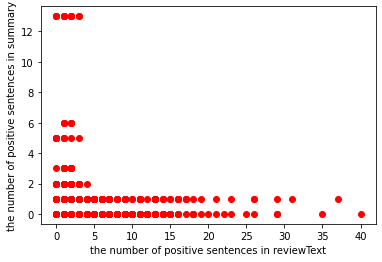

In [41]:
# plot a dotted line graph: the x-axis is “the number of positive sentences in a reviewText" and y-axis is “the number of positive sentences in its summary”
import matplotlib.pyplot as plt
plt.plot(df_merge2['the number of positive sentences in reviewText'], df_merge2['the number of positive sentences in summary'], "ro")
plt.xlabel('the number of positive sentences in reviewText')
plt.ylabel('the number of positive sentences in summary')
plt.show()

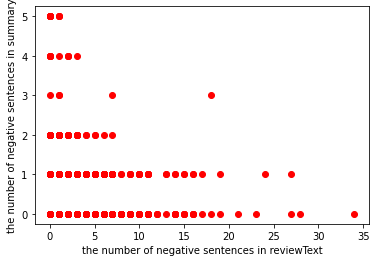

In [42]:
# plot a dotted line graph: the x-axis is “the number of negative sentences in a reviewText" and y-axis is “the number of negative sentences in its summary”
import matplotlib.pyplot as plt

plt.plot(df_merge2['the number of negative sentences in reviewText'], df_merge2['the number of negative sentences in summary'], "ro")
plt.xlabel('the number of negative sentences in reviewText')
plt.ylabel('the number of negative sentences in summary')
plt.show()


# 3. Discussion

From this task, I have learned learned several things:

(1) How to determine what data preprocessing steps are needed for a sentiment analysis task.

(2) I learned how to set different feature sets for a sentiment analysis task.

(3) I know how to do cross validation to evaluate the performance of a classifier.

(4) I can use the spacy library to extract the adjective, adverb, and verb words from a sentence.

(5) I can use the matplotlib library to draw dotted line graphs.

(6) I can predict the sentiment of a sentence.

(7) I can do other sentiment analysis tasks after this homework.

(8) I oberved that the adjectives in the negetive sentences also contains positive words like "good" and "great".